<a href="https://colab.research.google.com/github/Laureoby/books_dataset/blob/main/books_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data = pd.read_csv('/content/drive/MyDrive/books.csv')
data.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,NaN,NaN,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,NaN,NaN,NaN
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,NaN,NaN,NaN
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,NaN,NaN,NaN
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,NaN,NaN,NaN


In [19]:
data.duplicated().sum()

0

In [20]:
data.isnull().sum()

bookID                   0
title                    0
authors                  1
average_rating           1
isbn                     1
isbn13                   1
language_code            1
num_pages                1
ratings_count            1
text_reviews_count       1
publication_date         1
publisher                1
Unnamed: 12           8426
Unnamed: 13           8465
Unnamed: 14           8471
dtype: int64

In [21]:
#We just delete the some columns
data = data.drop(['Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'bookID', 'isbn', 'isbn13'], axis=1)
data.head()

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,9/13/2004,Scholastic


In [23]:
data.isnull().sum()

title                 0
authors               1
average_rating        1
language_code         1
num_pages             1
ratings_count         1
text_reviews_count    1
publication_date      1
publisher             1
dtype: int64

In [24]:
#We drop Nan values in dataset
data.dropna(inplace=True)
data.isnull().sum()

title                 0
authors               0
average_rating        0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [25]:
data['average_rating'].unique()

array(['4.57', '4.49', '4.42', '4.56', '4.78', '3.74', '4.73', '4.38',
       '4.22', '4.21', '3.44', '3.87', '4.07', '3.90', '3.83', '3.86',
       '3.91', '3.93', '4.59', '4.50', '4.36', '4.53', '3.84', '3.72',
       '4.00', '3.88', '4.33', '3.45', '3.76', '3.60', '4.06', '4.17',
       '3.55', '3.98', '4.13', '3.95', '4.24', '4.34', '3.92', '4.23',
       '3.75', '3.94', '3.77', '4.46', '3.68', '3.99', '3.25', '3.89',
       '3.82', '3.78', '4.01', '4.35', '4.28', '3.34', '3.67', '3.48',
       '3.50', '3.62', '4.27', '3.39', '4.12', '4.08', '4.05', '3.85',
       '2.99', '4.19', '3.71', '4.20', '3.65', '3.40', '4.11', '3.42',
       '4.02', '3.69', '4.10', '3.66', '4.61', '4.04', '3.97', '4.14',
       '3.57', '3.43', '3.22', '3.64', '3.96', '3.80', '3.81', '3.79',
       '3.23', '4.15', '4.39', '4.03', '3.73', '3.51', '3.63', '3.09',
       '3.59', '4.29', '0.00', '4.25', '4.26', '3.61', '4.16', '4.55',
       '4.52', '3.41', '4.70', '4.18', '3.58', '4.51', '3.15', '3.31',
      

In [26]:
# Convertir les valeurs en numérique, les non-numériques deviennent NaN
data['average_rating'] = pd.to_numeric(data['average_rating'], errors='coerce')
# Remplacer les NaN par 0
data['average_rating'].fillna(0, inplace=True)
data['average_rating'].unique()

array([4.57, 4.49, 4.42, 4.56, 4.78, 3.74, 4.73, 4.38, 4.22, 4.21, 3.44,
       3.87, 4.07, 3.9 , 3.83, 3.86, 3.91, 3.93, 4.59, 4.5 , 4.36, 4.53,
       3.84, 3.72, 4.  , 3.88, 4.33, 3.45, 3.76, 3.6 , 4.06, 4.17, 3.55,
       3.98, 4.13, 3.95, 4.24, 4.34, 3.92, 4.23, 3.75, 3.94, 3.77, 4.46,
       3.68, 3.99, 3.25, 3.89, 3.82, 3.78, 4.01, 4.35, 4.28, 3.34, 3.67,
       3.48, 3.5 , 3.62, 4.27, 3.39, 4.12, 4.08, 4.05, 3.85, 2.99, 4.19,
       3.71, 4.2 , 3.65, 3.4 , 4.11, 3.42, 4.02, 3.69, 4.1 , 3.66, 4.61,
       4.04, 3.97, 4.14, 3.57, 3.43, 3.22, 3.64, 3.96, 3.8 , 3.81, 3.79,
       3.23, 4.15, 4.39, 4.03, 3.73, 3.51, 3.63, 3.09, 3.59, 4.29, 0.  ,
       4.25, 4.26, 3.61, 4.16, 4.55, 4.52, 3.41, 4.7 , 4.18, 3.58, 4.51,
       3.15, 3.31, 4.09, 3.49, 3.56, 4.47, 4.44, 3.7 , 4.32, 4.4 , 4.31,
       4.43, 2.8 , 3.46, 2.83, 4.62, 2.67, 4.45, 4.3 , 5.  , 3.1 , 3.08,
       3.27, 3.33, 3.  , 4.67, 4.63, 3.52, 3.36, 3.54, 3.17, 4.37, 3.29,
       4.64, 3.38, 3.37, 3.16, 3.53, 2.88, 2.98, 3.

**Data visualization**

In [31]:
data.head()

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,9/13/2004,Scholastic


,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,9/13/2004,Scholastic


from matplotlib import pyplot as plt
_df_0['average_rating'].plot(kind='hist', bins=20, title='average_rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('authors').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('num_pages').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('ratings_count').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['publication_date']
  ys = series['average_rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('publication_date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('title')):
  _plot_series(series, series_name, i)
  fig.legend(title='title', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('publication_date')
_ = plt.ylabel('average_rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['publication_date']
  ys = series['average_rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('publication_date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('authors')):
  _plot_series(series, series_name, i)
  fig.legend(title='authors', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('publication_date')
_ = plt.ylabel('average_rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['publication_date']
  ys = series['average_rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('publication_date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('num_pages')):
  _plot_series(series, series_name, i)
  fig.legend(title='num_pages', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('publication_date')
_ = plt.ylabel('average_rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['publication_date']
  ys = series['average_rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('publication_date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('ratings_count')):
  _plot_series(series, series_name, i)
  fig.legend(title='ratings_count', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('publication_date')
_ = plt.ylabel('average_rating')

from matplotlib import pyplot as plt
_df_9['average_rating'].plot(kind='line', figsize=(8, 4), title='average_rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['authors'].value_counts()
    for x_label, grp in _df_10.groupby('title')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('title')
_ = plt.ylabel('authors')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['num_pages'].value_counts()
    for x_label, grp in _df_11.groupby('authors')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('authors')
_ = plt.ylabel('num_pages')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['ratings_count'].value_counts()
    for x_label, grp in _df_12.groupby('num_pages')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('num_pages')
_ = plt.ylabel('ratings_count')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['text_reviews_count'].value_counts()
    for x_label, grp in _df_13.groupby('ratings_count')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('ratings_count')
_ = plt.ylabel('text_reviews_count')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['title'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='average_rating', y='title', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['authors'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='average_rating', y='authors', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['num_pages'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='average_rating', y='num_pages', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['ratings_count'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='average_rating', y='ratings_count', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

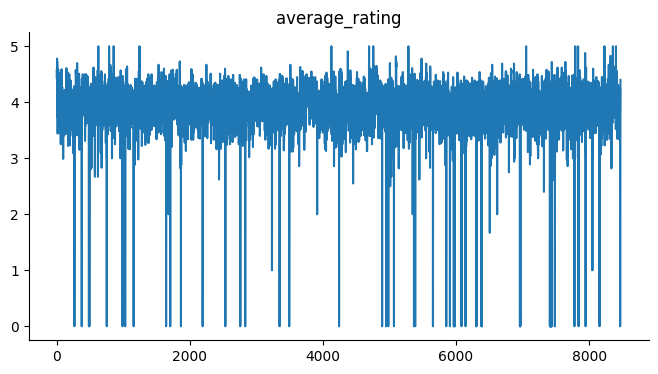

In [34]:
data['average_rating'].plot(kind='line', figsize=(8, 4), title='average_rating')
plt.gca().spines[['top', 'right']].set_visible(False)

In [41]:
data['ratings_count'] = pd.to_numeric(data['ratings_count'], errors='coerce')
data['ratings_count'].unique()

array([2095690., 2153167.,    6333., ...,    5226.,  437507.,    5473.])

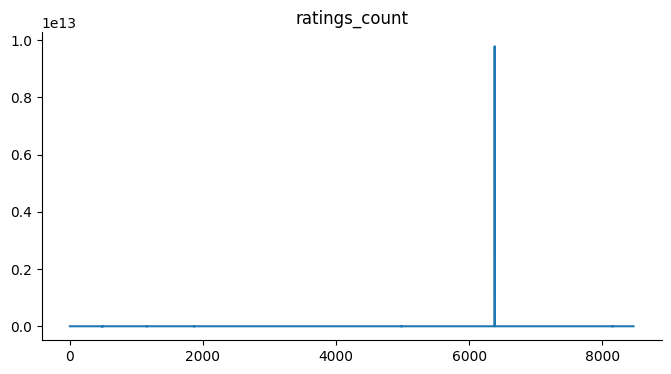

In [42]:
data['ratings_count'].plot(kind='line', figsize=(8, 4), title='ratings_count')
plt.gca().spines[['top', 'right']].set_visible(False)

In [47]:
data['num_pages'] = pd.to_numeric(data['num_pages'], errors='coerce')
data['num_pages'].unique()

array([6.52000000e+02, 8.70000000e+02, 3.52000000e+02, 4.35000000e+02,
       2.69000000e+03, 1.52000000e+02, 3.34200000e+03, 8.15000000e+02,
       2.15000000e+02, 6.00000000e+00, 5.44000000e+02, 5.50000000e+01,
       2.56000000e+02, 3.35000000e+02, 3.04000000e+02, 2.99000000e+02,
       2.54000000e+02, 3.24000000e+02, 2.70000000e+02, 1.72800000e+03,
       1.18400000e+03, 3.98000000e+02, 1.21600000e+03, 2.18000000e+02,
       2.24000000e+02, 5.58000000e+02, 2.08000000e+02, 4.80000000e+01,
       1.44000000e+02, 5.60000000e+01, 2.28000000e+02, 1.37000000e+02,
       3.39000000e+02, 3.69000000e+02, 3.88000000e+02, 1.40000000e+01,
       5.76000000e+02, 3.34000000e+02, 4.16000000e+02, 2.48000000e+02,
       1.28000000e+02, 2.88000000e+02, 7.20000000e+02, 4.48000000e+02,
       1.60000000e+02, 8.10000000e+01, 2.49000000e+02, 1.38000000e+02,
       1.92000000e+02, 1.08000000e+02, 8.32000000e+02, 1.23000000e+02,
       4.23000000e+02, 4.36000000e+02, 3.31000000e+02, 5.92000000e+02,
      

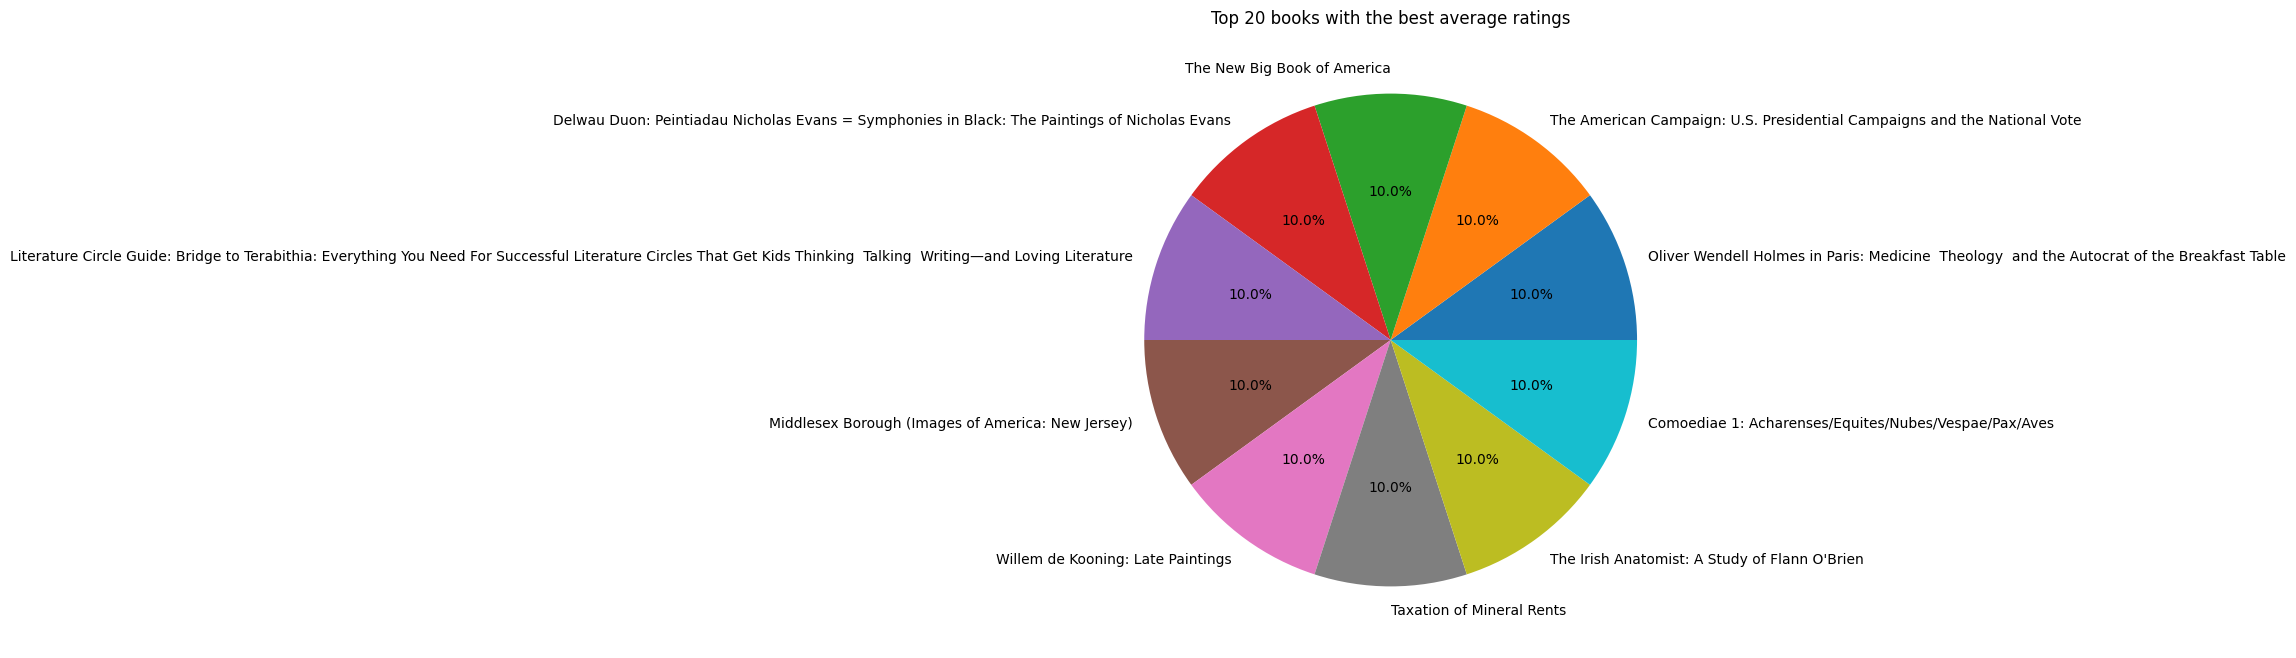

In [44]:
#Now we want to know twenty first books which has the most average rating
# Let's assume 'data' is your DataFrame and it contains 'title' and 'average rating' columns
# Sort the DataFrame by 'average rating' in descending order
top_books = data.sort_values(by='average_rating', ascending=False).head(10)

# create circular diagram
plt.figure(figsize=(10, 8))
plt.pie(top_books['average_rating'], labels=top_books['title'], autopct='%1.1f%%')
plt.title('Top 20 books with the best average ratings')
plt.show()

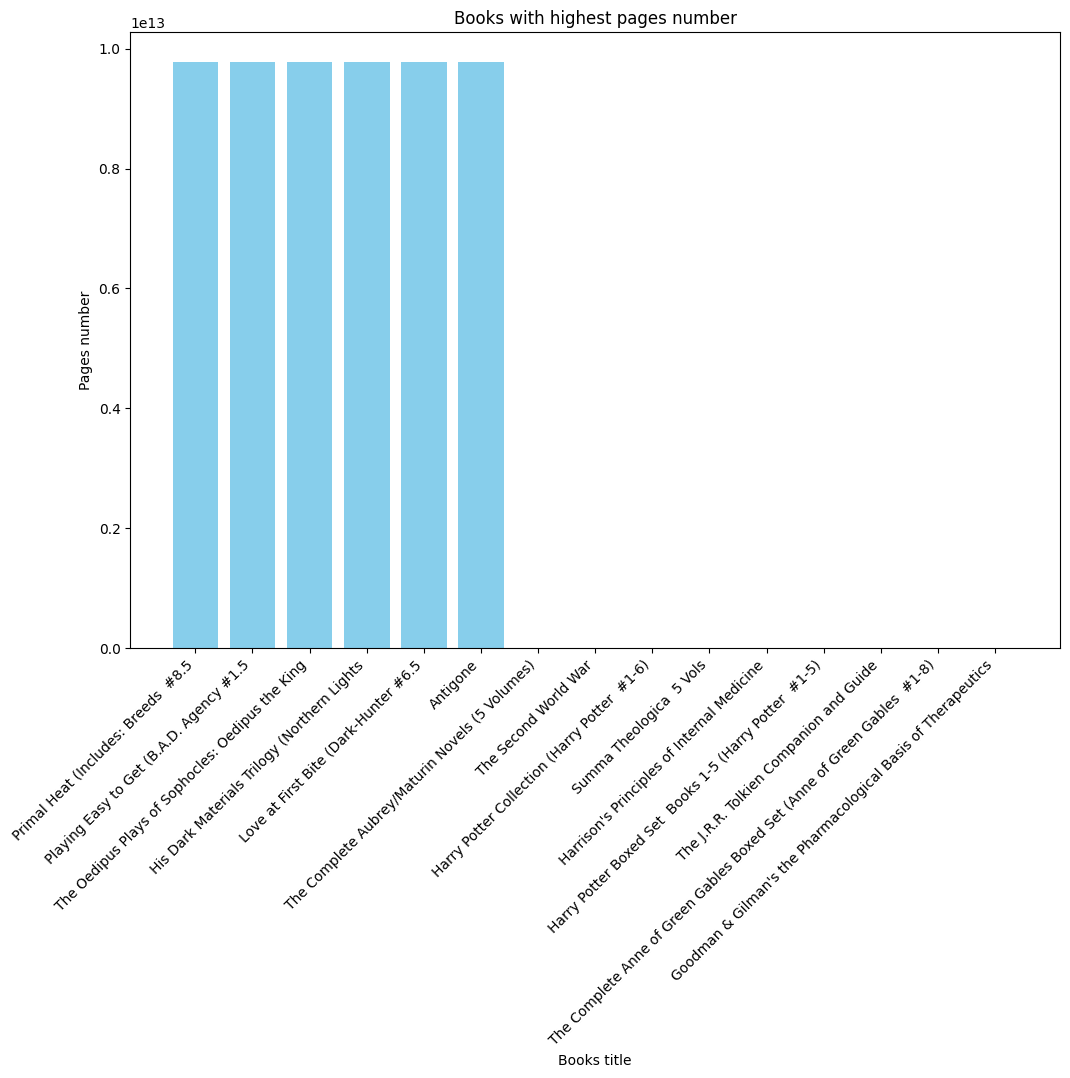

In [48]:
#We want to know books with highest pages number
top_pages = data.sort_values(by='num_pages', ascending=False).head(15)

# Créer un histogramme
plt.figure(figsize=(12, 8))
plt.bar(top_pages['title'], top_pages['num_pages'], color='skyblue')
plt.xlabel('Books title')
plt.ylabel('Pages number')  # Ajouter un label pour l'axe des y
plt.title('Books with highest pages number')
plt.xticks(rotation=45, ha='right')  # Rotation des labels pour une meilleure lisibilité
plt.show()